In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
df = pd.read_csv("ks-projects-201801.csv")

In [122]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0000,2015-08-11 12:12:28,0.0000,failed,0,GB,0.0000,0.0000,1533.9500
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0000,2017-09-02 04:43:57,2421.0000,failed,15,US,100.0000,2421.0000,30000.0000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0000,2013-01-12 00:20:50,220.0000,failed,3,US,220.0000,220.0000,45000.0000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0000,2012-03-17 03:24:11,1.0000,failed,1,US,1.0000,1.0000,5000.0000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0000,2015-07-04 08:35:03,1283.0000,canceled,14,US,1283.0000,1283.0000,19500.0000


## Feature Engineering

In [123]:
for col in df.columns:
    print(col)
    print(df[col].nunique())

ID
378661
name
375764
category
159
main_category
15
currency
14
deadline
3164
goal
8353
launched
378089
pledged
62130
state
6
backers
3963
country
23
usd pledged
95455
usd_pledged_real
106065
usd_goal_real
50339


In [124]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [125]:
df["state"].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [126]:
df["state"].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [127]:
del df["ID"]

In [128]:
df["deadline"] = pd.to_datetime(df["deadline"])

In [129]:
df.dtypes

name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched                    object
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [130]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0000,2015-08-11 12:12:28,0.0000,failed,0,GB,0.0000,0.0000,1533.9500
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0000,2017-09-02 04:43:57,2421.0000,failed,15,US,100.0000,2421.0000,30000.0000
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0000,2013-01-12 00:20:50,220.0000,failed,3,US,220.0000,220.0000,45000.0000
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0000,2012-03-17 03:24:11,1.0000,failed,1,US,1.0000,1.0000,5000.0000
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0000,2015-07-04 08:35:03,1283.0000,canceled,14,US,1283.0000,1283.0000,19500.0000


In [131]:
df["launched"] = pd.to_datetime(df["launched"])

In [132]:
df["launched"].head()

0   2015-08-11 12:12:28
1   2017-09-02 04:43:57
2   2013-01-12 00:20:50
3   2012-03-17 03:24:11
4   2015-07-04 08:35:03
Name: launched, dtype: datetime64[ns]

In [133]:
df["launch year"] = df["launched"].dt.year

In [134]:
df["duration_days"] = (df["deadline"] - df["launched"]).dt.days




In [135]:
df["duration_days"].describe()

count   378661.0000
mean        33.4811
std         65.9092
min          0.0000
25%         29.0000
50%         29.0000
75%         36.0000
max      16738.0000
Name: duration_days, dtype: float64

In [136]:
df = df.drop(df[df["duration_days"] > 100].index)

In [137]:
df["duration_days"].describe()

count   378654.0000
mean        33.2034
std         12.7932
min          0.0000
25%         29.0000
50%         29.0000
75%         36.0000
max         91.0000
Name: duration_days, dtype: float64

Text(0.5,1,'Duration of Kickstarter Projects')

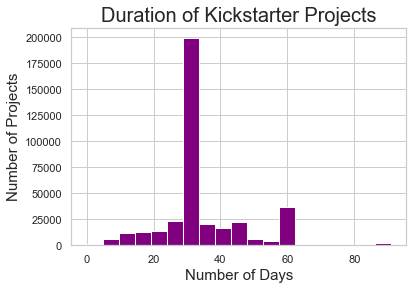

In [138]:
plt.hist(df["duration_days"], color="purple", bins=19)
plt.xlabel("Number of Days", fontsize=15)
plt.ylabel("Number of Projects", fontsize=15)
plt.title("Duration of Kickstarter Projects", fontsize=20)

In [139]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launch year,duration_days
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0000,2015-08-11 12:12:28,0.0000,failed,0,GB,0.0000,0.0000,1533.9500,2015,58
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0000,2017-09-02 04:43:57,2421.0000,failed,15,US,100.0000,2421.0000,30000.0000,2017,59
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0000,2013-01-12 00:20:50,220.0000,failed,3,US,220.0000,220.0000,45000.0000,2013,44
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0000,2012-03-17 03:24:11,1.0000,failed,1,US,1.0000,1.0000,5000.0000,2012,29
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0000,2015-07-04 08:35:03,1283.0000,canceled,14,US,1283.0000,1283.0000,19500.0000,2015,55


In [140]:
df["launch year"].describe()

count   378654.0000
mean      2014.2486
std          1.9239
min       2009.0000
25%       2013.0000
50%       2014.0000
75%       2016.0000
max       2018.0000
Name: launch year, dtype: float64

In [141]:
df.dtypes

name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
launch year                  int64
duration_days                int64
dtype: object

In [142]:
df = df.drop(df[df.state == "undefined"].index)

In [143]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38773
live            2799
suspended       1845
Name: state, dtype: int64

In [144]:
df = df.drop(df[(df.state == "live") | (df.state == "suspended")].index)

In [145]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38773
Name: state, dtype: int64

In [146]:
df["state"] = np.where(df["state"] == "canceled", "failed", df["state"])

In [147]:
df.state.value_counts()

failed        236492
successful    133956
Name: state, dtype: int64

In [148]:
df.head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launch year,duration_days
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0000,2015-08-11 12:12:28,0.0000,failed,0,GB,0.0000,0.0000,1533.9500,2015,58
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0000,2017-09-02 04:43:57,2421.0000,failed,15,US,100.0000,2421.0000,30000.0000,2017,59
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0000,2013-01-12 00:20:50,220.0000,failed,3,US,220.0000,220.0000,45000.0000,2013,44
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0000,2012-03-17 03:24:11,1.0000,failed,1,US,1.0000,1.0000,5000.0000,2012,29
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0000,2015-07-04 08:35:03,1283.0000,failed,14,US,1283.0000,1283.0000,19500.0000,2015,55
5,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0000,2016-02-26 13:38:27,52375.0000,successful,224,US,52375.0000,52375.0000,50000.0000,2016,34
6,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0000,2014-12-01 18:30:44,1205.0000,successful,16,US,1205.0000,1205.0000,1000.0000,2014,19
7,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0000,2016-02-01 20:05:12,453.0000,failed,40,US,453.0000,453.0000,25000.0000,2016,44
8,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0000,2014-04-24 18:14:43,8233.0000,failed,58,US,8233.0000,8233.0000,125000.0000,2014,34
9,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0000,2014-07-11 21:55:48,6240.5700,failed,43,US,6240.5700,6240.5700,65000.0000,2014,29


In [149]:
del df["category"]
del df["currency"]

In [150]:
df["main_category"].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [151]:
df["main_category"].count()

370448

In [152]:
df["main_category"].value_counts()

Film & Video    62280
Music           49253
Publishing      39047
Games           34723
Technology      31765
Design          29515
Art             27862
Food            24265
Fashion         22425
Theater         10849
Comics          10720
Photography     10675
Crafts           8661
Journalism       4672
Dance            3736
Name: main_category, dtype: int64

In [153]:
df["main_category"].value_counts() / df["main_category"].count()

Film & Video   0.1681
Music          0.1330
Publishing     0.1054
Games          0.0937
Technology     0.0857
Design         0.0797
Art            0.0752
Food           0.0655
Fashion        0.0605
Theater        0.0293
Comics         0.0289
Photography    0.0288
Crafts         0.0234
Journalism     0.0126
Dance          0.0101
Name: main_category, dtype: float64

In [154]:
df["main_category"].value_counts().index

Index(['Film & Video', 'Music', 'Publishing', 'Games', 'Technology', 'Design',
       'Art', 'Food', 'Fashion', 'Theater', 'Comics', 'Photography', 'Crafts',
       'Journalism', 'Dance'],
      dtype='object')

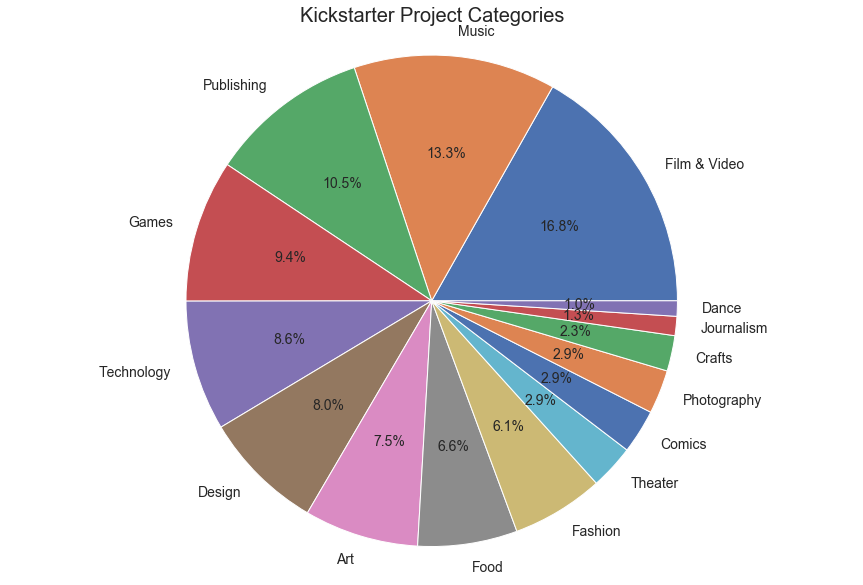

In [155]:
plt.figure(figsize=(15,10))
plt.pie((df["main_category"].value_counts() / df["main_category"].count()), autopct = "%1.1f%%", 
        labels=df["main_category"].value_counts().index, textprops={'fontsize': 14})
plt.axis("equal")
plt.title("Kickstarter Project Categories", fontsize = 20)
plt.show()


In [156]:
df["month_launched"] = df["launched"].dt.month_name()

In [157]:
df.head()

,name,main_category,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launch year,duration_days,month_launched
0,The Songs of Adelaide & Abullah,Publishing,2015-10-09,1000.0000,2015-08-11 12:12:28,0.0000,failed,0,GB,0.0000,0.0000,1533.9500,2015,58,August
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,30000.0000,2017-09-02 04:43:57,2421.0000,failed,15,US,100.0000,2421.0000,30000.0000,2017,59,September
2,Where is Hank?,Film & Video,2013-02-26,45000.0000,2013-01-12 00:20:50,220.0000,failed,3,US,220.0000,220.0000,45000.0000,2013,44,January
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,5000.0000,2012-03-17 03:24:11,1.0000,failed,1,US,1.0000,1.0000,5000.0000,2012,29,March
4,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,19500.0000,2015-07-04 08:35:03,1283.0000,failed,14,US,1283.0000,1283.0000,19500.0000,2015,55,July


Text(0,0.5,'Number of Projects')

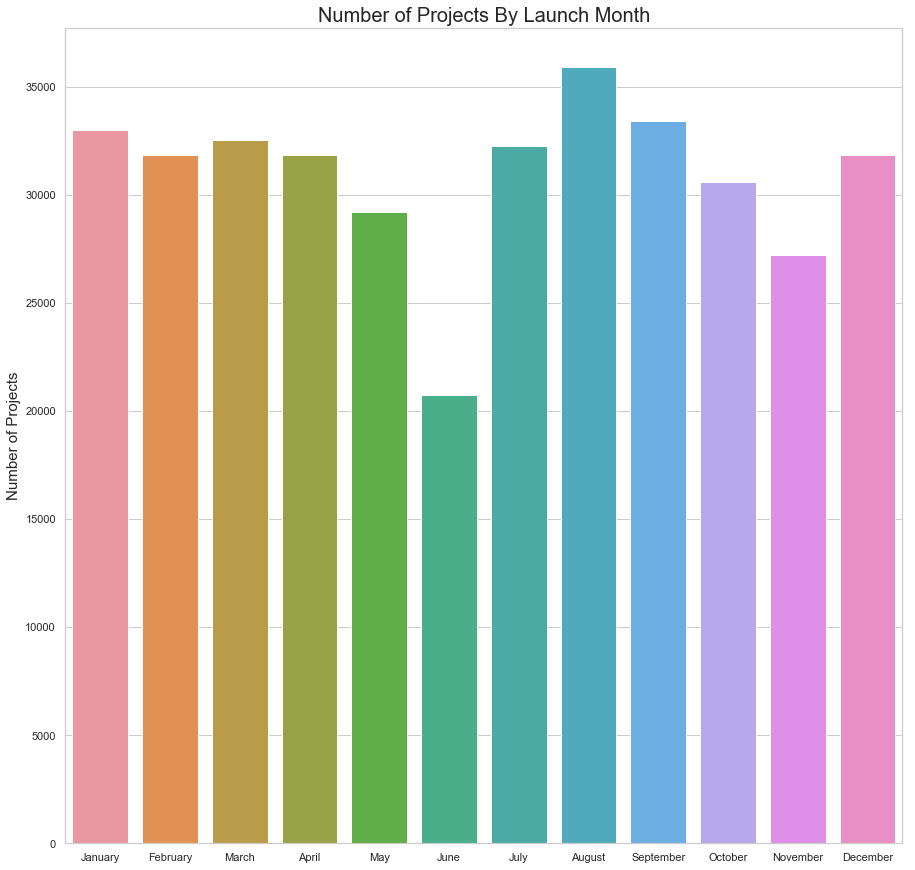

In [159]:
import seaborn as sns

sns.set(style="whitegrid")
ax = sns.barplot(x=df["month_launched"].unique(), y=df["month_launched"].value_counts(), data=df, order=["January", "February", "March",
                                                                                                   "April", "May", "June", "July",
                                                                                                   "August", "September", "October",
                                                                                                   "November", "December"])
sns.set(rc={'figure.figsize':(15,15)})
ax.set_title("Number of Projects By Launch Month", size=20)
ax.set_ylabel("Number of Projects", size=15)


In [40]:
df["country"].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'LU', 'SG', 'N,0"',
       'JP'], dtype=object)

In [41]:
df.dtypes

name                        object
main_category               object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
launch year                  int64
duration_days                int64
month_launched              object
dtype: object

In [42]:
df = pd.concat([df, pd.get_dummies(df[["main_category", "country", "month_launched"]])], axis=1)



In [43]:
df.shape

(370448, 65)

In [44]:
df["successful"] = np.where(df["state"] == "successful", 1, 0)

In [45]:
del df["state"]

In [46]:
df.head()

,name,main_category,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,...,month_launched_February,month_launched_January,month_launched_July,month_launched_June,month_launched_March,month_launched_May,month_launched_November,month_launched_October,month_launched_September,successful
0,The Songs of Adelaide & Abullah,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,GB,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,15,US,100.0,2421.0,...,0,0,0,0,0,0,0,0,1,0
2,Where is Hank?,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,3,US,220.0,220.0,...,0,1,0,0,0,0,0,0,0,0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,1,US,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,14,US,1283.0,1283.0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
df.columns[:20]

Index(['name', 'main_category', 'deadline', 'goal', 'launched', 'pledged',
       'backers', 'country', 'usd pledged', 'usd_pledged_real',
       'usd_goal_real', 'launch year', 'duration_days', 'month_launched',
       'main_category_Art', 'main_category_Comics', 'main_category_Crafts',
       'main_category_Dance', 'main_category_Design', 'main_category_Fashion'],
      dtype='object')

In [48]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [49]:
df.goal.describe()

count      370448.0000
mean        48642.6866
std       1159877.0241
min             0.0100
25%          2000.0000
50%          5500.0000
75%         16300.0000
max     100000000.0000
Name: goal, dtype: float64

In [50]:
df[df["goal"] > 300000].shape[0] / df.shape[0]

0.01176683367166242

In [51]:
df["goal"].quantile(.9)

50000.0

Text(0.5,1,'Monetary Goals For All Kickstarter Projects')

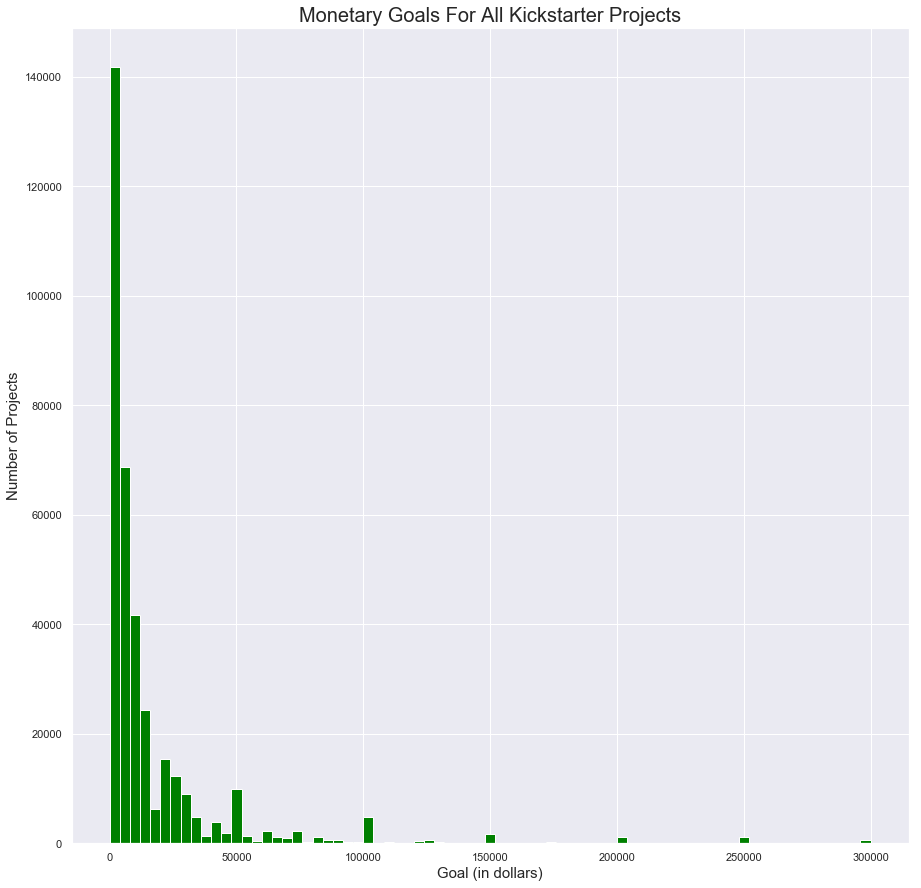

In [52]:
plt.hist(df["goal"], color="green", range=(0,300000), bins=75)
plt.xlabel("Goal (in dollars)", fontsize=15)
plt.ylabel("Number of Projects", fontsize=15)
plt.title("Monetary Goals For All Kickstarter Projects", fontsize=20)

Text(0.5,1,'Kickstarter Projects With Monetary Goals Below $50,000')

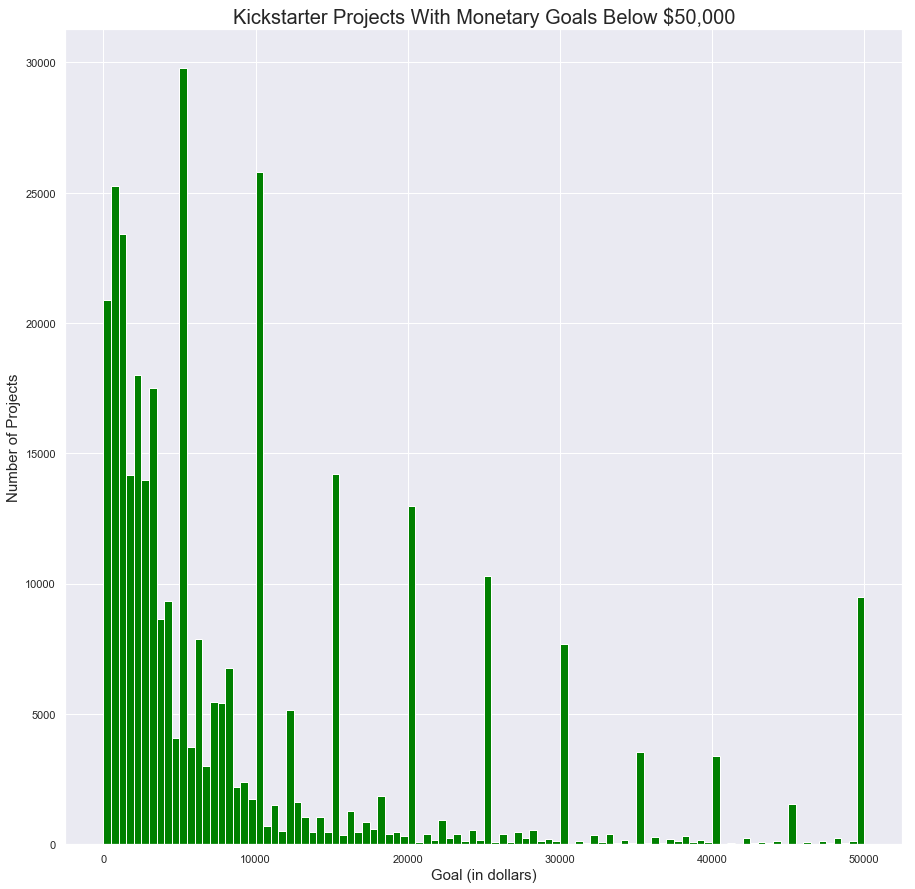

In [53]:
plt.hist(df["goal"], color="green", range=(0,50000), bins=100)
plt.xlabel("Goal (in dollars)", fontsize=15)
plt.ylabel("Number of Projects", fontsize=15)
plt.title("Kickstarter Projects With Monetary Goals Below $50,000", fontsize=20)

In [54]:
df.drop(df[["month_launched", "name", "main_category", "country", "deadline", "launched", "pledged", "pledged", "backers", "usd pledged",
           "usd_pledged_real"]], axis=1, inplace=True)


In [55]:
df.head()

,goal,usd_goal_real,launch year,duration_days,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,...,month_launched_February,month_launched_January,month_launched_July,month_launched_June,month_launched_March,month_launched_May,month_launched_November,month_launched_October,month_launched_September,successful
0,1000.0000,1533.9500,2015,58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000.0000,30000.0000,2017,59,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,45000.0000,45000.0000,2013,44,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,5000.0000,5000.0000,2012,29,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,19500.0000,19500.0000,2015,55,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
df.isna().sum()

goal                          0
usd_goal_real                 0
launch year                   0
duration_days                 0
main_category_Art             0
main_category_Comics          0
main_category_Crafts          0
main_category_Dance           0
main_category_Design          0
main_category_Fashion         0
main_category_Film & Video    0
main_category_Food            0
main_category_Games           0
main_category_Journalism      0
main_category_Music           0
main_category_Photography     0
main_category_Publishing      0
main_category_Technology      0
main_category_Theater         0
country_AT                    0
country_AU                    0
country_BE                    0
country_CA                    0
country_CH                    0
country_DE                    0
country_DK                    0
country_ES                    0
country_FR                    0
country_GB                    0
country_HK                    0
country_IE                    0
country_

In [57]:
#now that a few different features have been engineered (e.g., duration, launch month), setting up a training and test set

offset = int(df.shape[0] / 2)
df_train = df.iloc[:offset]
df_test = df.iloc[offset:]

x_train, y_train = df_train.loc[:, ~df_train.columns.isin(["successful"])], df_train["successful"]
x_test, y_test = df_test.loc[:, ~df_test.columns.isin(["successful"])], df_test["successful"]

## Trying out several possible models to find the most accurate one

In [58]:
#Naive Bayes

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
model = bnb.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
print("Percent accuracy for Naive Bayes on training set: ", (y_pred_train == y_train).sum() / df_train.shape[0])

Percent accuracy for Naive Bayes on training set:  0.6503206927827927


In [59]:
y_pred_test = model.predict(x_test)
print("Percent accuracy for Naive Bayes on test set: ", (y_pred_test == y_test).sum() / df_test.shape[0])


Percent accuracy for Naive Bayes on test set:  0.6519619487755366


In [60]:
#KNN Regression
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors=10, weights="distance")
neighbors.fit(x_train, y_train)
y_pred_train = neighbors.predict(x_train)
print("Percent accuracy for KNN on training set: ", (y_pred_train == y_train).sum() / df_train.shape[0])

#tried different values for n_neighbors, and 10 maximized the predictive power of the model

Percent accuracy for KNN on training set:  0.9337180926877726


In [61]:
y_pred_test = neighbors.predict(x_test)
print("Percent accuracy for KNN on test set: ", (y_pred_test == y_test).sum() / df_test.shape[0])

Percent accuracy for KNN on test set:  0.63964712996156


In [62]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

logist = LogisticRegression(fit_intercept=False, C=1)
logist.fit(x_train, y_train)
y_pred_train = logist.predict(x_train)

print("Percent accuracy for Logistic Regression on training set: ", (y_pred_train == y_train).sum() / df_train.shape[0])

Percent accuracy for Logistic Regression on training set:  0.637120459551678


In [63]:
y_pred_test = logist.predict(x_test)
print("Percent accuracy for Logistic Regression on test set: ", (y_pred_test == y_test).sum() / df_test.shape[0])

Percent accuracy for Logistic Regression on test set:  0.6396687254351487


In [64]:
#lasso regression
from sklearn.linear_model import LogisticRegression

#checking for the most accurate lambda to use
lambdas = [.02, .05, .10, .15, .25, .35, .5, .55, .65, .75, .95, 1, 1.1]


for lam in lambdas:
    lass = LogisticRegression(C=1/lam, fit_intercept=False, penalty="l1")
    lass.fit(x_train, y_train)
    print(lam, lass.score(x_train, y_train))


0.02 0.6679533969679955
0.05 0.6680289811255561
0.1 0.667996587915173
0.15 0.6679372003628039
0.25 0.6680613743359392
0.35 0.6679749924415842
0.5 0.6679749924415842
0.55 0.6679425992312011
0.65 0.6679857901783786
0.75 0.6680289811255561
0.95 0.6680127845203645
1 0.6680073856519674
1.1 0.6679857901783786


In [65]:
#lasso regression using optimized value for inverse of lambda


lass = LogisticRegression(fit_intercept=False, penalty="l1", C=1)
lass.fit(x_train, y_train)
y_pred_train = lass.predict(x_train)

print("Percent accuracy for Lasso Regression on training set: ", (y_pred_train == y_train).sum() / df_train.shape[0])

Percent accuracy for Lasso Regression on training set:  0.6680505765991448


In [66]:
print("Coefficients for lasso regression:")
lass.coef_

Coefficients for lasso regression:


array([[-9.19211042e-07, -1.42552510e-05,  1.49339090e-04,
        -1.90884164e-02,  2.68907112e-01,  8.14581794e-01,
        -5.37419649e-01,  1.11065815e+00,  2.87779262e-01,
        -4.21577718e-01,  3.12422893e-01, -2.75809412e-01,
         2.42859539e-01, -5.22025275e-01,  6.39107907e-01,
        -1.35755259e-01, -1.20465581e-01, -3.24829515e-01,
         1.07485481e+00, -8.88724164e-01, -6.55637358e-01,
        -5.79921929e-01, -5.85927587e-01, -5.34556342e-01,
        -7.13490359e-01, -3.47864034e-01, -8.06033073e-01,
        -2.42165313e-01, -3.12865393e-01,  1.25923313e-01,
        -6.33589442e-01, -1.11406158e+00,  0.00000000e+00,
        -1.24473239e-01, -8.94235090e-01, -4.02266532e-01,
        -7.73696700e-01, -7.42521370e-01, -5.14741104e-01,
        -5.65717283e-01, -1.96108546e-01, -2.03317653e-01,
         9.51148827e-02, -4.94069436e-02, -3.42729452e-02,
         1.02100706e-01, -8.73357000e-04, -1.14297133e-01,
         6.38538818e-02,  1.35240145e-01,  1.06223044e-0

In [67]:
y_pred_test = lass.predict(x_test)
print("Percent accuracy for Lasso Regression on test set: ", (y_pred_test == y_test).sum() / df_test.shape[0])

Percent accuracy for Lasso Regression on test set:  0.6699779726169395


In [68]:
#Ridge regression

ridge = LogisticRegression(fit_intercept=False, penalty="l2", C=1)
ridge.fit(x_train, y_train)
y_pred_train = ridge.predict(x_train)

print("Percent accuracy for Ridge Regression on training set: ", (y_pred_train == y_train).sum() / df_train.shape[0])

Percent accuracy for Ridge Regression on training set:  0.637120459551678


In [69]:
print("Coefficients for ridge regression:")
ridge.coef_

Coefficients for ridge regression:


array([[-2.85666592e-06, -1.56709669e-05, -1.46542175e-04,
        -8.41820549e-05,  2.32858489e-07,  6.10182262e-07,
        -4.95723568e-07,  3.18261501e-07,  2.38325499e-07,
        -1.04838558e-06,  6.65977914e-07, -8.21037104e-07,
         1.95526351e-07, -2.60197174e-07,  1.90068102e-06,
        -3.19637154e-07, -1.03460536e-06, -1.11055957e-06,
         8.59550028e-07, -2.94821413e-08, -2.82863939e-07,
        -2.05937882e-08, -4.49645016e-07, -2.03669570e-08,
        -1.60026496e-07, -3.84768467e-09, -1.04638074e-07,
        -2.60504209e-08, -8.57201541e-08,  2.08476782e-08,
        -2.71122427e-08, -1.88269434e-07,  7.05015648e-10,
        -2.24356943e-10, -6.34115116e-08,  2.98432960e-09,
        -1.23073798e-07, -2.20704976e-08, -3.44903122e-08,
        -2.94438462e-08, -4.41357456e-09,  1.58242478e-06,
         1.46999004e-07, -2.76377094e-07, -2.31446263e-07,
         9.98938458e-08, -1.70173798e-07, -5.38285813e-07,
         6.95521875e-08,  2.45081499e-07,  2.06485079e-0

In [70]:
y_pred_test = ridge.predict(x_test)
print("Percent accuracy for Ridge Regression on test set: ", (y_pred_test == y_test).sum() / df_test.shape[0])

Percent accuracy for Ridge Regression on test set:  0.6396687254351487


In [71]:
y_train_tree = np.where(df_train["successful"] == 1, "successful", "failed")
y_test_tree = np.where(df_test["successful"] == 1, "successful", "failed")


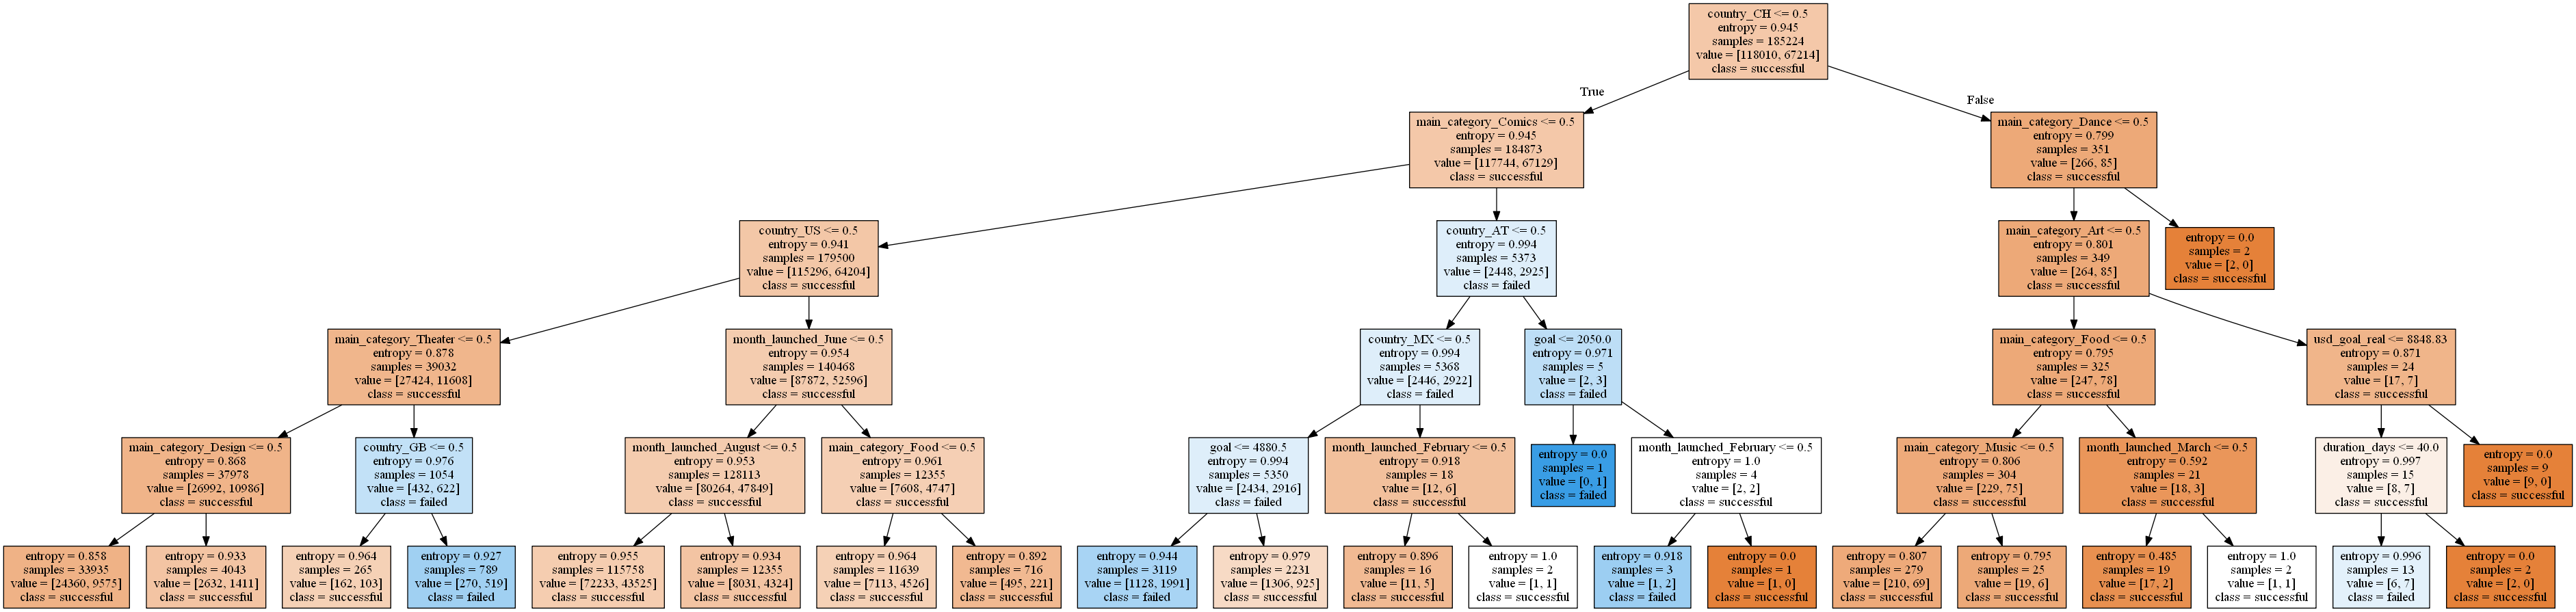

In [72]:
#Decision Tree

from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn import tree
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import ensemble

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=5
)
model = decision_tree.fit(x_train, y_train_tree)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=x_train.columns,
    class_names=["successful", "failed"],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#tested out different max_fetures and max_depth, and 2 and 5 (respectively) maximized the predictive power

In [73]:
y_pred_train = model.predict(x_train)
print("Percent accuracy for Decision Tree on training set: ", (y_pred_train == y_train_tree).sum() / df_train.shape[0])

Percent accuracy for Decision Tree on training set:  0.6431401978145381


In [74]:
y_pred_test = model.predict(x_test)
print("Percent accuracy for Decision Tree on test set: ", (y_pred_test == y_test_tree).sum() / df_test.shape[0])

Percent accuracy for Decision Tree on test set:  0.6457316546451863


In [75]:
# Random Forest
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

rfc.fit(x_train, y_train)
y_pred_train = rfc.predict(x_train)
print("Percent accuracy for Random Forest on training set: ", (y_pred_train == y_train).sum() / df_train.shape[0])

Percent accuracy for Random Forest on training set:  0.9159396190558459


In [76]:
y_pred_test = rfc.predict(x_test)
print("Percent accuracy for Random Forest on test set: ", (y_pred_test == y_test).sum() / df_test.shape[0])

Percent accuracy for Random Forest on test set:  0.6473243208223556


## Diving Deeper Into Lasso Regression Model 

In [77]:
lass = LogisticRegression(fit_intercept=False, penalty="l1", C=1)
lass.fit(x_train, y_train)
y_pred_train = lass.predict(x_train)

print("Percent accuracy for Lasso Regression on training set: ", (y_pred_train == y_train).sum() / df_train.shape[0])

Percent accuracy for Lasso Regression on training set:  0.6679641947047898


In [78]:
y_pred_test = lass.predict(x_test)
print("Percent accuracy for Lasso Regression on test set: ", (y_pred_test == y_test).sum() / df_test.shape[0])

Percent accuracy for Lasso Regression on test set:  0.6699455794065564


In [79]:
print("Coefficients for lasso regression:")
lass.coef_

Coefficients for lasso regression:


array([[-9.36487437e-07, -1.42105982e-05,  7.83099608e-05,
        -1.90685042e-02,  2.06244786e-01,  7.52067059e-01,
        -5.99948764e-01,  1.04812187e+00,  2.25311734e-01,
        -4.83490396e-01,  2.49395824e-01, -3.38163006e-01,
         1.80571250e-01, -5.84149281e-01,  5.76764408e-01,
        -1.98303045e-01, -1.82893333e-01, -3.87069781e-01,
         1.01257503e+00, -6.33147939e-01, -3.99599309e-01,
        -3.23967027e-01, -3.29419063e-01, -2.78926196e-01,
        -4.57770974e-01, -9.04842436e-02, -5.50189097e-01,
         6.59821842e-03, -5.68681980e-02,  3.83826317e-01,
        -3.77843284e-01, -8.58257347e-01,  0.00000000e+00,
         0.00000000e+00, -6.36446459e-01, -1.45990785e-01,
        -5.17810366e-01, -4.85357596e-01, -2.58615400e-01,
        -3.08526420e-01,  2.35335226e-02,  5.23323749e-02,
         4.35095556e-02, -1.01503717e-01, -8.59006710e-02,
         5.04861069e-02, -5.30096563e-02, -1.65875817e-01,
         1.23092580e-02,  8.37459261e-02,  5.44777869e-0

In [80]:
print("Features for lasso regression: ")
x_train.columns

Features for lasso regression: 


Index(['goal', 'usd_goal_real', 'launch year', 'duration_days',
       'main_category_Art', 'main_category_Comics', 'main_category_Crafts',
       'main_category_Dance', 'main_category_Design', 'main_category_Fashion',
       'main_category_Film & Video', 'main_category_Food',
       'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater', 'country_AT', 'country_AU', 'country_BE',
       'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES',
       'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT',
       'country_JP', 'country_LU', 'country_MX', 'country_N,0"', 'country_NL',
       'country_NO', 'country_NZ', 'country_SE', 'country_SG', 'country_US',
       'month_launched_April', 'month_launched_August',
       'month_launched_December', 'month_launched_February',
       'month_launched_January', 'month_l

In [81]:
a = np.array(lass.coef_).tolist()
b = np.array(x_train.columns).tolist()

feature_importance = list(zip(a[0], b))

In [82]:
feature_importance

[(-9.364874368732808e-07, 'goal'),
 (-1.4210598153986785e-05, 'usd_goal_real'),
 (7.830996084368622e-05, 'launch year'),
 (-0.019068504168895058, 'duration_days'),
 (0.20624478582125005, 'main_category_Art'),
 (0.7520670586745793, 'main_category_Comics'),
 (-0.5999487644225533, 'main_category_Crafts'),
 (1.0481218733905346, 'main_category_Dance'),
 (0.22531173358725132, 'main_category_Design'),
 (-0.48349039644309966, 'main_category_Fashion'),
 (0.24939582413737127, 'main_category_Film & Video'),
 (-0.33816300631867385, 'main_category_Food'),
 (0.18057125039432056, 'main_category_Games'),
 (-0.5841492812381968, 'main_category_Journalism'),
 (0.576764408475158, 'main_category_Music'),
 (-0.1983030448320102, 'main_category_Photography'),
 (-0.1828933326110753, 'main_category_Publishing'),
 (-0.3870697807341008, 'main_category_Technology'),
 (1.0125750337474493, 'main_category_Theater'),
 (-0.633147939201643, 'country_AT'),
 (-0.3995993091311966, 'country_AU'),
 (-0.3239670272612108, 'cou

In [83]:
sorted(feature_importance)

[(-0.8582573465929124, 'country_IT'),
 (-0.6364464592486168, 'country_MX'),
 (-0.633147939201643, 'country_AT'),
 (-0.5999487644225533, 'main_category_Crafts'),
 (-0.5841492812381968, 'main_category_Journalism'),
 (-0.5501890974020277, 'country_ES'),
 (-0.5178103662466338, 'country_NL'),
 (-0.4853575960225091, 'country_NO'),
 (-0.48349039644309966, 'main_category_Fashion'),
 (-0.4577709736057366, 'country_DE'),
 (-0.3995993091311966, 'country_AU'),
 (-0.3870697807341008, 'main_category_Technology'),
 (-0.3778432842872877, 'country_IE'),
 (-0.33816300631867385, 'main_category_Food'),
 (-0.32941906262785825, 'country_CA'),
 (-0.3239670272612108, 'country_BE'),
 (-0.3085264195848361, 'country_SE'),
 (-0.2789261955104968, 'country_CH'),
 (-0.25861539980550596, 'country_NZ'),
 (-0.1983030448320102, 'main_category_Photography'),
 (-0.1828933326110753, 'main_category_Publishing'),
 (-0.16587581719814282, 'month_launched_July'),
 (-0.14599078543254795, 'country_N,0"'),
 (-0.10150371698320255, 

In [113]:
MVF = []
for (a,b) in feature_importance:
    if a > .5:
        MVF.append(b)
    elif a < -.5:
        MVF.append(b)

        

In [114]:
MVF

['main_category_Comics',
 'main_category_Crafts',
 'main_category_Dance',
 'main_category_Journalism',
 'main_category_Music',
 'main_category_Theater',
 'country_AT',
 'country_ES',
 'country_IT',
 'country_MX',
 'country_NL']

In [115]:
x_train_revised = x_train[MVF]
x_test_revised = x_test[MVF]

In [116]:
x_train_revised.head()

,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Journalism,main_category_Music,main_category_Theater,country_AT,country_ES,country_IT,country_MX,country_NL
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [117]:
rfc = ensemble.RandomForestClassifier()

rfc.fit(x_train_revised, y_train)
y_pred_train = rfc.predict(x_train_revised)
print("Percent accuracy for Random Forest on REVISED training set: ", (y_pred_train == y_train).sum() / df_train.shape[0])

Percent accuracy for Random Forest on REVISED training set:  0.6482313307130826


In [118]:
y_pred_test = rfc.predict(x_test_revised)
print("Percent accuracy for Random Forest on REVISED test set: ", (y_pred_test == y_test).sum() / df_test.shape[0])

Percent accuracy for Random Forest on REVISED test set:  0.6512708936206971
